# Técnicas y métricas de evaluación de modelos de Machine Learning
Actividad Lección 5 || Programación Python para Machine Learning

Objetivos:
* Aprender a utilizar las técnicas de validación cruzada y métricas de evaluación de modelos de Machine Learning

Datos del alumno:
* Víctor Luque Martín
* Máster Avanzado en Programación en Python para Hacking, BigData y Machine Learning

Fecha: 07/12/2022

# Tabla de Contenidos
1. [Importes](#importes)
2. [Carga del dataset](#carga)
3. [Conteo de Clases](#conteo)
    1. [Analisis de los datos](#analisis)
4. [Evaluación del rendimiento](#evaluacion)
    1. [K-Fold Cross Validation](#cross)
    2. [Leave One Out Cross Validation](#loo)
    3. [Monte Carlo Cross Validation](#monte)
5. [Conclusiones](#conclusiones)

# Importes <a name="importes"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
import random

# Carga del dataset <a class="anchor" name="carga"></a>
Se carga el dataset [Climate Model Simulation Crashes](https://archive.ics.uci.edu/ml/datasets/climate+model+simulation+crashes#) para trabajar las validaciones cruzadas

In [2]:
df = pd.read_csv('pop_failures.dat', sep='\s+')
df

,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,...,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
0,1,1,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,...,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,0
1,1,2,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,...,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,1
2,1,3,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,...,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,1
3,1,4,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,...,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,1
4,1,5,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,...,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,3,176,0.657136,0.489375,0.133713,0.411950,0.087780,0.356289,0.480204,0.029678,...,0.280546,0.384117,0.885948,0.768482,0.459479,0.334482,0.573002,0.610183,0.737706,1
536,3,177,0.915894,0.842720,0.518947,0.090622,0.336981,0.893576,0.978703,0.674868,...,0.798108,0.353546,0.044796,0.990900,0.347027,0.512499,0.810549,0.593332,0.142565,0
537,3,178,0.478600,0.941185,0.769245,0.950776,0.189406,0.112743,0.745645,0.527096,...,0.193103,0.829563,0.101506,0.548878,0.381966,0.198811,0.867108,0.461632,0.652817,1
538,3,179,0.007793,0.779287,0.867468,0.704820,0.983282,0.420303,0.710612,0.174746,...,0.761134,0.436714,0.690132,0.825133,0.981656,0.113193,0.364799,0.201469,0.536535,1


# Conteo de Clases <a class="anchor" name="conteo"></a>


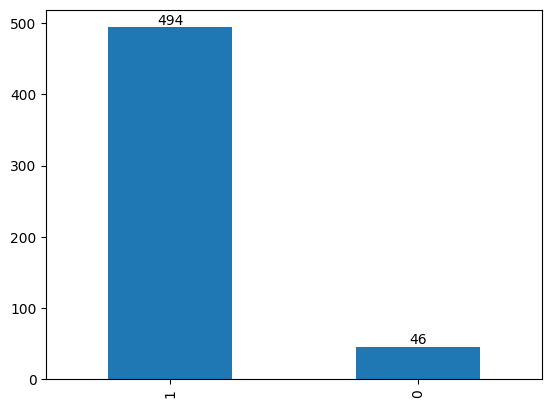

In [3]:
df['outcome'].value_counts().plot(kind='bar')
for i, v in enumerate(df['outcome'].value_counts()):
    plt.text(i, v, str(v), color='black', ha='center', va='bottom')
plt.show()

## Análisis de los datos <a class="anchor" name="analisis"></a>
* Como podemos observar, estamos ante un problema de clasificación binaria.
* Además, existe un desequilibrio de clases, siendo la clase 1 la que más se repite y la clase 0 la que menos. 
* Esto puede ser un problema para el modelo, ya que puede aprender a clasificar la clase 1 y no la clase 0.


# Evaluación del rendimiento <a class="anchor" name="evaluacion"></a>
Para evaluar el rendimiento de los modelos se utilizarán las siguientes técnicas:
* K-Fold Cross Validation
* Leave One Out Cross Validation
* Monte Carlo Cross Validation

Previamente deberemos separar las variables independientes de la variable dependiente. Se eliminarán las variables Study y Run que no aportan información al modelo ya que se tratan de Identificadores.

El modelo seleccionado para la evaluación será el modelo de K Vecinos más Cercanos (KNNeighborsClassifier).

Para conocer todas las métricas disponibles en Scikit-Learn, se puede consultar la siguiente [página](https://scikit-learn.org/stable/modules/model_evaluation.html).

In [4]:
X = df.drop(columns=['outcome', "Study", "Run"])
y = df["outcome"]
model = KNeighborsClassifier()

## K-Fold Cross Validation <a class="anchor" name="kfold"></a>
Para esta validación se aplicarán las siguientes métricas o scores:
* Balanced Accuracy
* Accuracy
* AUC

In [5]:
k = 8
seed = random.randint(0, 10)
kfold = model_selection.KFold(n_splits=k, random_state=seed, shuffle=True)
results_ba = model_selection.cross_val_score(model, X, y, cv=kfold, scoring="balanced_accuracy")
results_a = model_selection.cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
results_ra = model_selection.cross_val_score(model, X, y, cv=kfold, scoring="roc_auc")
print("Balanced Accuracy: %.3f%% +/- %.3f%%" % (results_ba.mean()*100.0, results_ba.std() *100.0))
print("Accuracy: %.3f%% +/- %.3f%%" % (results_a.mean()*100.0, results_a.std() *100.0))
print("AUC: %.3f%% +/- %.3f%%" % (results_ra.mean()*100.0, results_ra.std() *100.0))

Balanced Accuracy: 60.444% +/- 9.214%
Accuracy: 92.587% +/- 3.251%
AUC: 76.024% +/- 12.436%


## Leave One Out Cross Validation <a class="anchor" name="loo"></a>
Para esta validación se aplicarán las siguientes métricas o scores:
* Accuracy

En cada iteración solo se obtiene un dato de prueba por lo que no es posible calcular las métricas Balanced Accuracy y AUC.

In [6]:
loocv = model_selection.LeaveOneOut()
results_a = model_selection.cross_val_score(model, X, y, cv=loocv, scoring='accuracy')
print("Accuracy: %.3f%% +/- %.3f%%" % (results_a.mean()*100.0, results_a.std() *100.0))

Accuracy: 92.778% +/- 25.886%


## Monte Carlo Cross Validation <a class="anchor" name="monte"></a>
Para esta validación se aplicarán las siguientes métricas o scores:
* Balanced Accuracy
* Accuracy
* AUC

In [7]:
k = 200
seed = random.randint(0, 50)
test_portion = 0.2
montecarlo = model_selection.ShuffleSplit(n_splits=k, test_size=test_portion, random_state=seed)
results_ba = model_selection.cross_val_score(model, X, y, cv=montecarlo, scoring="balanced_accuracy")
results_a = model_selection.cross_val_score(model, X, y, cv=montecarlo, scoring="accuracy")
results_ra = model_selection.cross_val_score(model, X, y, cv=montecarlo, scoring="roc_auc")
print("Balanced Accuracy: %.3f%% +/- %.3f%%" % (results_ba.mean()*100.0, results_ba.std()*100.0))
print("Accuracy: %.3f%% +/- %.3f%%" % (results_a.mean()*100.0, results_a.std()*100.0))
print("AUC: %.3f%% +/- %.3f%%" % (results_ra.mean()*100.0, results_ra.std()*100.0))

Balanced Accuracy: 61.824% +/- 6.938%
Accuracy: 92.889% +/- 2.252%
AUC: 80.377% +/- 7.400%


# Conclusiones <a class="anchor" name="conclusiones"></a>
* Como hemos podido observar el dataset no está balanceado, por lo que el modelo puede aprender a clasificar la clase 1 de manera más efectiva que la clase 0.
* Tras aplicar las técnicas de evaluación del rendimiento durante la validación cruzada se han encontrado las siguientes conclusiones:
    * La precisión en todos los casos es mayor al 92% de acierto aproximadamente, con ligeras desviaciones. Indicando que el modelo es capaz de identificar valores verdaderos (TP y TN) de manera correcta.
    * La precisión al utilizar la validación cruzada "Leave One Out" es mayor al +/- 25%, indicando que existe una gran variabilidad en los resultados.
    * La precisión balanceada (cuando ha sido posible aplicarla) es cercana al 60%, con una desviación típica entre un +/- 12% y un +/- 6%, indicando que el modelo puede clasificar aproximadamente algo más de la mitad de las clases correctamente.
    * El área bajo la curva ROC (cuando ha sido posible aplicarla) es cercana al 80%, además de tener una desviación en torno al +/- 8%, indicando que hay una alta probabilidad de que el modelo pueda clasificar correctamente las clases.